0.025104310773146447 0.2550998225008394
Вид уравнения: x = A * y + B
Коэффициенты:
Slope: A = 0.025104310773146468 
Intercept: B = 0.2550998225008351


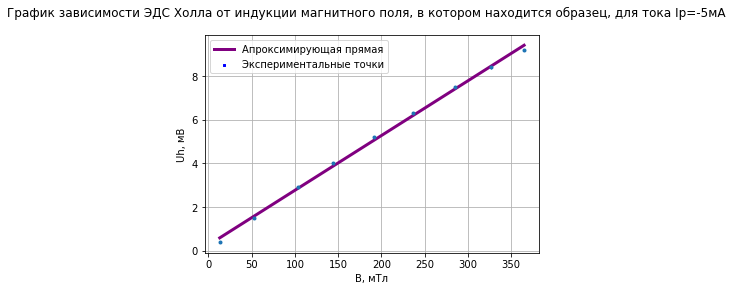

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
wookbook = openpyxl.load_workbook("dassein.xlsx")
worksheet = wookbook.active
x = np.array([[i.value for i in j] for j in worksheet['A1':'A9']])
y = np.array([[i.value for i in j] for j in worksheet['B1':'B9']])
ye = np.array([[i.value for i in j] for j in worksheet['C1':'C9']])
x = x.flatten()
y = y.flatten()
ye = ye.flatten()
A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
#подсчет коэффициентов вручную при сигма=константе в распределении Гаусса
my=y.sum()/9
mx=x.sum()/9
a2=np.dot(x.T, x)/9
a11=np.dot(x.T, y)/9
kk=(a11-mx*my)/(a2-mx**2)
bb=my-kk*mx#kk и bb в точности совпадают с a и b. Это говорит о том, что функция np.linalg.lstsq выдает параметры ЛЗ не учитывая веса экспериментальных точек(стандартный МНК), если точки сами по себе имеют погрешности(тогда и Slope и Intercept тоже будут представлять из себя сегмент), то нужно пользоваться расширенной версией МНК, чего в библиотеке matplotlib.pyplot я не нашел. Впрочем, в искомом практикуме погрешность прямых измерений не учитывалась и коэффициенты в точности(вплоть до 3-4 знака после запятой) совпали с теми, что я предоставлял на сдаче 
print(kk, bb)
print('Вид уравнения: x = A * y + B' '\n' 'Коэффициенты:' '\n' "Slope: A =",a, '\n' 'Intercept: B =',b)
plt.plot(x, (a * x + b), color="purple", linewidth = 3, label='Апроксимирующая прямая')
plt.scatter(x, y, s=8, color="blue", marker="s", label='Экспериментальные точки')
plt.errorbar(x, y, yerr, fmt=".", elinewidth=1)
plt.legend()
plt.xlabel('B, мТл')
plt.ylabel('Uh, мВ')
plt.suptitle('График зависимости ЭДС Холла от индукции магнитного поля, в котором находится образец, для тока Ip=-5мА')
plt.grid() 
plt.show() 